# Pre-proccessing via matrix factorization basic idea tests

In [2]:
from juliacall import Main as jl
jl.seval("""
         import Pkg
         ENV["JULIA_SSL_CA_ROOTS_PATH"]=""
         ENV["JULIA_PKG_USE_CLI_GIT"]=true
         Pkg.add(url=\"https://github.com/MPF-Optimization-Laboratory/KLLS.jl.git\")
         """)

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


    Updating git-repo `https://github.com/MPF-Optimization-Laboratory/KLLS.jl.git`
   Resolving package versions...
  No Changes to `C:\Users\mking\.julia\environments\pyjuliapkg\Project.toml`
  No Changes to `C:\Users\mking\.julia\environments\pyjuliapkg\Manifest.toml`


In [90]:
from keras.datasets import mnist
(data, labels), (_, _) = mnist.load_data()
data = data/255;

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy import linalg as la
from sklearn.utils.extmath import randomized_svd
import sklearn.decomposition as skd
from sklearn import random_projection as rproj

# Vectorization of data.
vec_data = np.zeros([28**2,np.shape(data)[0]])

for i in range(np.shape(data)[0]):
    vec_data[:,i] = (data[i,:,:]).flatten();

In [31]:
jl.seval("""
         using KLLS
         solve = KLLS.solve!
         rescale = KLLS.scale!
         maximize = KLLS.maximize!
         regularize = KLLS.regularize!
         dObj = KLLS.dObj!
         dGrad = KLLS.dGrad!
         """);

# Actual experiments - PCA dimension here need to be sussed out

In [12]:
np.shape(vec_data.mean(1))

(784,)

In [79]:
#{
# X = (vec_data.T - vec_data.mean(1)).T
# X = X.T
# X = vec_data.T
# print(X.shape)
#
# PCA = skd.PCA(n_components = 500,svd_solver='randomized').fit(X)
#}

(60000, 784)


In [93]:
transformer = rproj.GaussianRandomProjection()
transformer.fit(vec_data)

MemoryError: Unable to allocate 2.55 GiB for an array with shape (5712, 60000) and data type float64

In [ ]:

transformer.shape()

In [73]:
testmodel = jl.KLLSModel(W,b)
p = jl.solve(testmodel, logging=1,max_time= 300.0,max_iter = 2000)


KL regularized least-squares
   m =        500  bNrm = 7.0e+00
   n =        784  λ    = 1.5e-08
                   τ    = 1.0e+00

Solver parameters:
   atol = 6.1e-06  max time (sec) =     300
   rtol = 6.1e-06  target ∥r∥<ε   = 4.9e-05

   iter   dual Obj    ∥∇dObj∥          Δ      Δₐ/Δₚ  cg its      cg msg
      0  -1.00e+00   7.05e+00    1.0e+00   0.0e+00       0             
      1  -8.05e+00   7.05e+00    1.5e+00   1.0e+00       1            ⊕
      2  -1.86e+01   7.04e+00    2.3e+00   1.0e+00       1            ⊕
      3  -3.45e+01   7.04e+00    3.4e+00   1.0e+00       1            ⊕
      4  -5.82e+01   7.03e+00    5.1e+00   1.0e+00       1            ⊕
      5  -9.38e+01   7.02e+00    7.6e+00   1.0e+00       1            ⊕
      6  -1.47e+02   7.00e+00    1.1e+01   1.0e+00       1            ⊕
      7  -2.27e+02   6.97e+00    1.7e+01   1.0e+00       1            ⊕
      8  -3.46e+02   6.95e+00    2.6e+01   1.0e+00       1            ⊕
      9  -5.23e+02   6.93e+00    3.8e+0

(500, 784)
(784,)


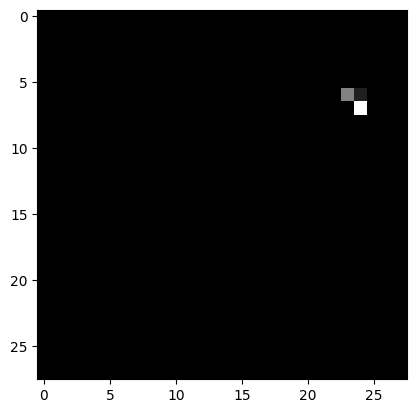

In [78]:
print(np.shape(W))
print(np.shape(p.solution))
var = p.solution
plt.imshow(var.reshape([28,28]),cmap ='gray')

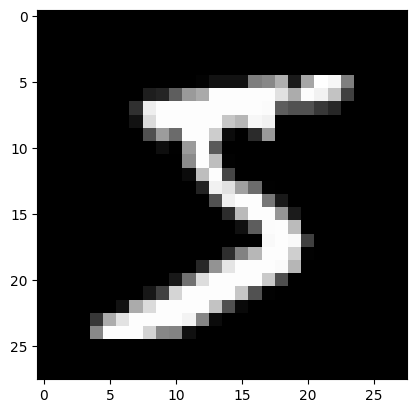

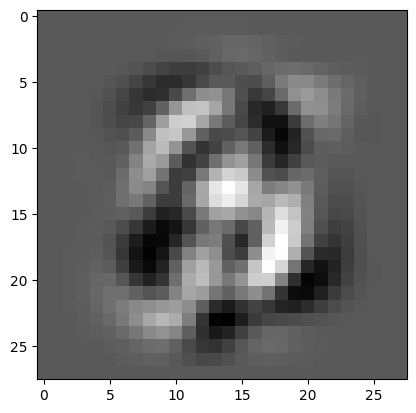

In [61]:
plt.figure()
plt.imshow((X[:,0] + vec_data.mean(1)).reshape(28,28),cmap='gray')
plt.figure()
plt.imshow((X@((W.T)@p.solution)).reshape(28,28),cmap='gray')
